In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pandasql import sqldf
from sklearn.linear_model import LinearRegression
pysqldf = lambda q: sqldf(q, globals())

In [2]:
# Initialize data
event_data = pd.read_csv('athlete_events.csv')
region_data = pd.read_csv('noc_regions.csv')
full_data = event_data.merge(region_data, on="NOC")

In [3]:
# Add features to full_data
def medal_code(data):
    if(data['Medal']) == "Gold":
        return 1
    elif(data['Medal']) == "Silver":
        return 2
    elif(data['Medal']) == "Bronze":
        return 3
    else :
        return 4

def sport(data):
    if(data['Sport']) == "Athletics":
        if "metres" in data['Event'] or "marathon" in data['Event'] or "mile" in data['Event'] or "cross-country" in data['Event']:
            return "Athletics (Track)"
        elif "athlon" in data['Event'] or "all-around" in data['Event']:
            return "Athletics (All-Around)"
        else:
            return "Athletics (Field)"
    else:
        return "{}".format(data['Sport'])

def sport_category(data):
    if(data['Sport']) in ["Basketball", "Softball", "Hockey", "Curling", "Football", "Volleyball", "Baseball", "Water Polo", "Handball", "Ice Hockey", "Rugby Sevens", "Tug-Of-War", "Rugby", "Lacrosse", "Judo", "Boxing", "Wrestling", "Badminton", "Fencing", "Table Tennis", "Tennis", "Taekwondo", "Beach Volleyball"]:
        return "Versus"
    elif(data['Sport']) in ["Rowing", "Bobsleigh", "Speed Skating", "Short Track Speed Skating", "Swimming", "Triathlon", "Athletics (Track)", "Cycling", "Sailing", "Canoeing", "Cross Country Skiing", "Alpine Skiing", "Biathlon", "Skeleton", "Luge", "Motorboating"]:
        return "Race"
    elif(data['Sport']) in ["Synchronized Swimming", "Rhythmic Gymnastics", "Gymnastics", "Athletics (Field)", "Snowboarding", "Shooting", "Weightlifting", "Diving", "Figure Skating", "Freestyle Skiing", "Trampolining", "Golf", "Equestrianism", "Ski Jumping", "Archery"]:
        return "Hi-Score"
    else:
        return "Combined"

full_data['Medal Code'] = full_data.apply(medal_code, axis=1)
full_data['Sport'] = full_data.apply(sport, axis=1)
full_data['Sport Category'] = full_data.apply(sport_category, axis=1)

In [4]:
# Create reduced_data, removing records with missing age/height/weight 
reduced_data = full_data[full_data['Age'].notna()]
reduced_data = reduced_data[reduced_data['Height'].notna()]
reduced_data = reduced_data[reduced_data['Weight'].notna()]

# Add BMI to reduced_data
reduced_data['BMI'] = reduced_data['Weight']/pow(reduced_data['Height']/100, 2)

In [5]:
reduced_data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Medal Code,Sport Category,BMI
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,4,Versus,24.691358
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,4,Versus,20.761246
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN,4,Versus,22.642193
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN,4,Versus,24.218750
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,4,Race,19.132653
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,4,Race,19.132653
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN,4,Race,22.724403
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN,4,Race,22.724403
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN,2,Race,23.388687
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN,4,Race,23.388687


In [6]:
# Separate dataframe with medalists only
reduced_data_medalists = pysqldf("""
           SELECT *
           FROM reduced_data
           WHERE "Medal Code" IS NOT 4
           """)

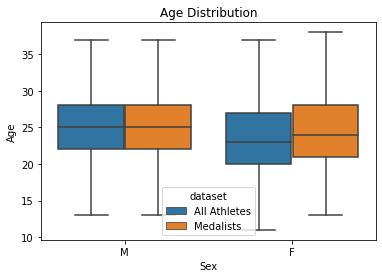

In [7]:
reduced_data['dataset'] = 'All Athletes'
reduced_data_medalists['dataset'] = 'Medalists'
sns.boxplot(data=pd.concat([reduced_data, reduced_data_medalists]), x='Sex', y='Age', hue='dataset', showfliers=False)
plt.title("Age Distribution")
plt.show()

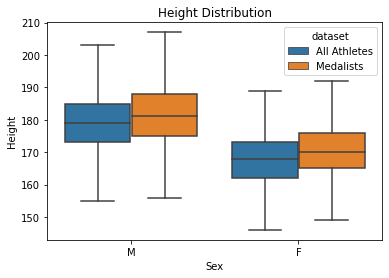

In [8]:
sns.boxplot(data=pd.concat([reduced_data, reduced_data_medalists]), x='Sex', y='Height', hue='dataset', showfliers=False)
plt.title("Height Distribution")
plt.show()

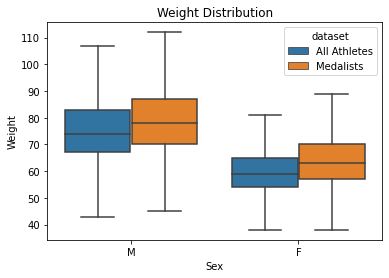

In [9]:
sns.boxplot(data=pd.concat([reduced_data, reduced_data_medalists]), x='Sex', y='Weight', hue='dataset', showfliers=False)
plt.title("Weight Distribution")
plt.show()

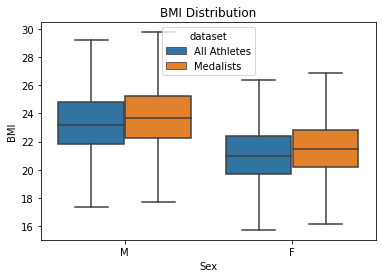

In [10]:
sns.boxplot(data=pd.concat([reduced_data, reduced_data_medalists]), x='Sex', y='BMI', hue='dataset', showfliers=False)
plt.title("BMI Distribution")
plt.show()

In [11]:
# Averages for all athletes vs medalists: men
concat_data = pd.concat([reduced_data, reduced_data_medalists])
pysqldf("""SELECT "dataset",
           AVG(Age),
           AVG(Height),
           AVG(Weight),
           AVG(BMI)
           FROM concat_data
           WHERE Sex = "M"
           GROUP BY "dataset"
           """)

,dataset,AVG(Age),AVG(Height),AVG(Weight),AVG(BMI)
0,All Athletes,25.667887,178.967548,75.795053,23.545946
1,Medalists,25.863130,181.353775,79.252080,23.964186


In [12]:
# Averages for all athletes vs medalists: women
pysqldf("""SELECT "dataset",
           AVG(Age),
           AVG(Height),
           AVG(Weight),
           AVG(BMI)
           FROM concat_data
           WHERE Sex = "F"
           GROUP BY "dataset"
           """)

,dataset,AVG(Age),AVG(Height),AVG(Weight),AVG(BMI)
0,All Athletes,23.781552,167.867261,60.027223,21.193275
1,Medalists,24.596152,170.538238,63.222663,21.631776


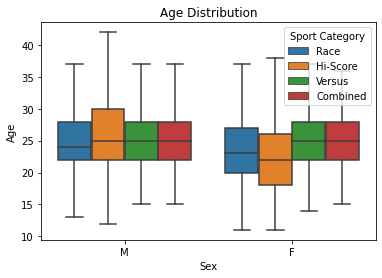

In [13]:
sns.boxplot(data=reduced_data, x='Sex', y='Age', hue='Sport Category', hue_order = ["Race", "Hi-Score", "Versus", "Combined"], showfliers=False)
plt.title("Age Distribution")
plt.show()

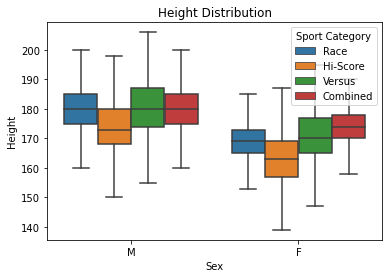

In [14]:
sns.boxplot(data=reduced_data, x='Sex', y='Height', hue='Sport Category', hue_order = ["Race", "Hi-Score", "Versus", "Combined"], showfliers=False)
plt.title("Height Distribution")
plt.show()

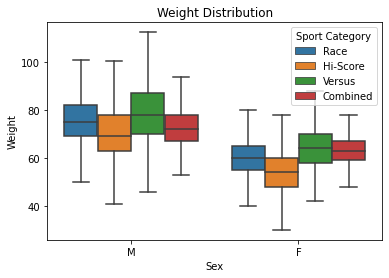

In [15]:
sns.boxplot(data=reduced_data, x='Sex', y='Weight', hue='Sport Category', hue_order = ["Race", "Hi-Score", "Versus", "Combined"], showfliers=False)
plt.title("Weight Distribution")
plt.show()

In [16]:
# Averages between categories: men
pysqldf("""SELECT "Sport Category",
           AVG(Age),
           AVG(Height),
           AVG(Weight),
           AVG(BMI)
           FROM reduced_data
           WHERE Sex = "M"
           GROUP BY "Sport Category"
           """)

,Sport Category,AVG(Age),AVG(Height),AVG(Weight),AVG(BMI)
0,Combined,25.283363,179.886865,72.973380,22.484926
1,Hi-Score,26.961565,174.303191,72.555794,23.722686
2,Race,24.991181,180.527449,75.855142,23.208377
3,Versus,25.612952,180.582244,78.774666,23.996591


In [17]:
# Averages between categories: women
pysqldf("""SELECT "Sport Category",
           AVG(Age),
           AVG(Height),
           AVG(Weight),
           AVG(BMI)
           FROM reduced_data
           WHERE Sex = "F"
           GROUP BY "Sport Category"
           """)

,Sport Category,AVG(Age),AVG(Height),AVG(Weight),AVG(BMI)
0,Combined,25.206597,173.342014,62.713542,20.843834
1,Hi-Score,23.077226,162.981613,55.549977,20.729912
2,Race,23.454155,169.153359,60.542570,21.116008
3,Versus,25.393187,171.408947,64.821920,22.001204


In [18]:
# Average stats by sport: all athletes
avg_stats_by_sport = pysqldf("""SELECT
           "Sport" AS sport,
           "Sport Category" AS sport_category,
           COUNT(DISTINCT(Id)) AS competitors,
           AVG(Age) AS avg_age,
           AVG(Height) AS avg_height,
           AVG(Weight) AS avg_weight,
           AVG(BMI) AS avg_bmi,
           AVG("Body Fat %") AS avg_body_fat
           FROM reduced_data
           GROUP BY sport
           HAVING competitors >= 50
           """)
# Average stats by sport: medalists
avg_stats_by_sport_medalists = pysqldf("""SELECT
           "Sport" AS sport,
           COUNT(DISTINCT(Id)) AS medalists,
           AVG(Age) AS avg_age_medalists,
           AVG(Height) AS avg_height_medalists,
           AVG(Weight) AS avg_weight_medalists,
           AVG(BMI) AS avg_bmi_medalists,
           AVG("Body Fat %") AS avg_body_fat_medalists
           FROM reduced_data_medalists
           GROUP BY sport
           HAVING medalists >= 10
           """)

avg_stats_by_sport_comparison_medalists = avg_stats_by_sport.merge(avg_stats_by_sport_medalists, how='inner', on="sport")
avg_stats_by_sport_comparison_medalists["avg_age_diff"]=avg_stats_by_sport_comparison_medalists["avg_age_medalists"]-avg_stats_by_sport_comparison_medalists["avg_age"]
avg_stats_by_sport_comparison_medalists["avg_height_diff"]=avg_stats_by_sport_comparison_medalists["avg_height_medalists"]-avg_stats_by_sport_comparison_medalists["avg_height"]
avg_stats_by_sport_comparison_medalists["avg_weight_diff"]=avg_stats_by_sport_comparison_medalists["avg_weight_medalists"]-avg_stats_by_sport_comparison_medalists["avg_weight"]
avg_stats_by_sport_comparison_medalists["avg_bmi_diff"]=avg_stats_by_sport_comparison_medalists["avg_bmi_medalists"]-avg_stats_by_sport_comparison_medalists["avg_bmi"]
avg_stats_by_sport_comparison_medalists["avg_body_fat_diff"]=avg_stats_by_sport_comparison_medalists["avg_body_fat_medalists"]-avg_stats_by_sport_comparison_medalists["avg_body_fat"]
avg_stats_by_sport_comparison_medalists.sort_values("avg_age_diff")

,sport,sport_category,competitors,avg_age,avg_height,avg_weight,avg_bmi,avg_body_fat,medalists,avg_age_medalists,avg_height_medalists,avg_weight_medalists,avg_bmi_medalists,avg_body_fat_medalists,avg_age_diff,avg_height_diff,avg_weight_diff,avg_bmi_diff,avg_body_fat_diff
43,Table Tennis,Versus,642,26.623213,171.317896,64.985706,22.035554,0.0,83,24.705128,170.641026,63.589744,21.743774,0.0,-1.918085,-0.676870,-1.395963,-0.291780,0.0
34,Shooting,Hi-Score,3221,32.013389,173.552105,74.053209,24.466936,0.0,399,30.201107,173.701107,74.885609,24.702178,0.0,-1.812282,0.149002,0.832400,0.235242,0.0
1,Archery,Hi-Score,843,26.272969,173.249602,70.014870,23.203607,0.0,142,24.791262,173.349515,70.832524,23.435757,0.0,-1.481707,0.099913,0.817654,0.232150,0.0
46,Trampolining,Hi-Score,90,25.167785,166.563758,59.322148,21.297575,0.0,20,23.965517,166.310345,59.137931,21.263068,0.0,-1.202268,-0.253414,-0.184217,-0.034508,0.0
32,Rugby Sevens,Versus,297,26.080808,175.363636,79.006734,25.456048,0.0,74,25.337838,176.594595,81.256757,25.869383,0.0,-0.742970,1.230958,2.250023,0.413334,0.0
44,Taekwondo,Versus,460,24.083893,176.750000,68.088087,21.609987,0.0,120,23.451389,178.555556,68.722222,21.365381,0.0,-0.632504,1.805556,0.634135,-0.244606,0.0
3,Athletics (Field),Hi-Score,6935,26.434240,178.864324,76.809051,23.691841,0.0,877,25.986301,181.170377,81.032534,24.432106,0.0,-0.447939,2.306053,4.223483,0.740265,0.0
5,Badminton,Versus,732,25.823529,174.278481,68.275130,22.386905,0.0,120,25.493506,174.590909,67.837662,22.197200,0.0,-0.330023,0.312428,-0.437468,-0.189705,0.0
35,Short Track Speed Skating,Race,422,22.836022,170.108199,64.310484,22.114089,0.0,147,22.514599,169.686131,64.094891,22.195884,0.0,-0.321423,-0.422068,-0.215593,0.081795,0.0
2,Athletics (All-Around),Combined,767,25.068582,181.989805,76.573679,22.982044,0.0,103,24.752000,182.568000,78.488000,23.441871,0.0,-0.316582,0.578195,1.914321,0.459827,0.0


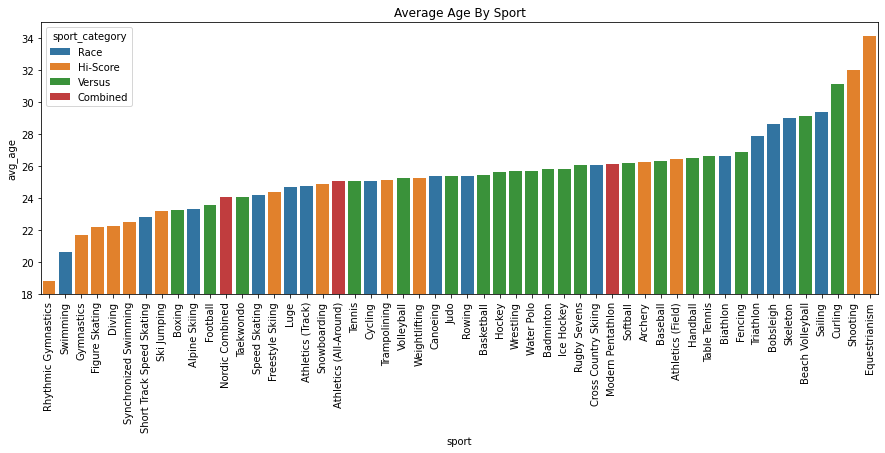

In [19]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_comparison_medalists, x='sport', y='avg_age', hue='sport_category', order=avg_stats_by_sport_comparison_medalists.sort_values('avg_age')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Average Age By Sport")
plt.xticks(rotation=90)
plt.ylim(18, 35)
plt.show()

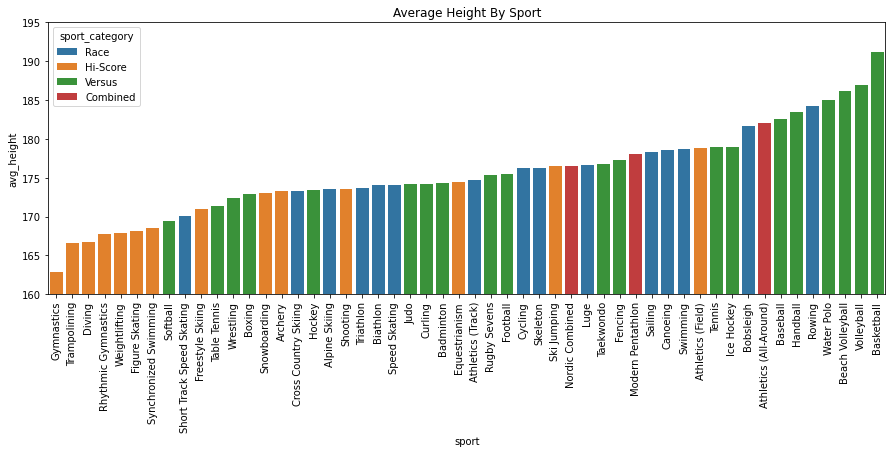

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_comparison_medalists, x='sport', y='avg_height', hue='sport_category', order=avg_stats_by_sport_comparison_medalists.sort_values('avg_height')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Average Height By Sport")
plt.xticks(rotation=90)
plt.ylim(160, 195)
plt.show()

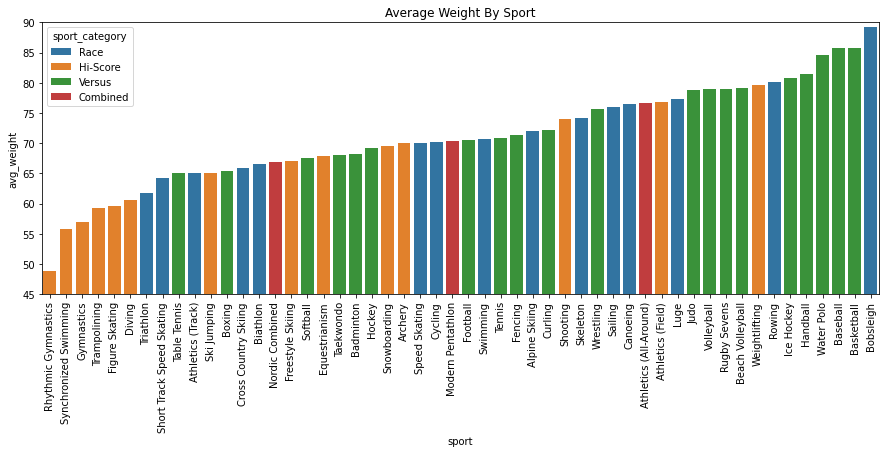

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_comparison_medalists, x='sport', y='avg_weight', hue='sport_category', order=avg_stats_by_sport_comparison_medalists.sort_values('avg_weight')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Average Weight By Sport")
plt.xticks(rotation=90)
plt.ylim(45, 90)
plt.show()

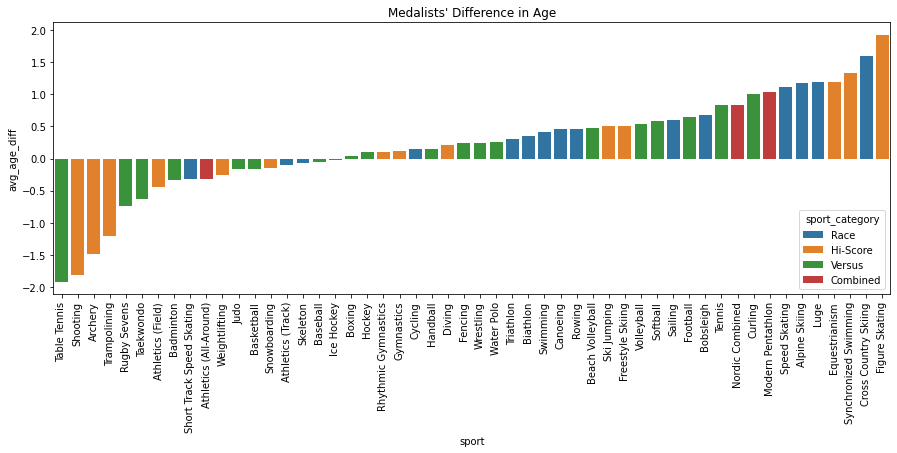

In [22]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_comparison_medalists, x='sport', y='avg_age_diff', hue='sport_category', order=avg_stats_by_sport_comparison_medalists.sort_values('avg_age_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Medalists' Difference in Age")
plt.xticks(rotation=90)
plt.show()

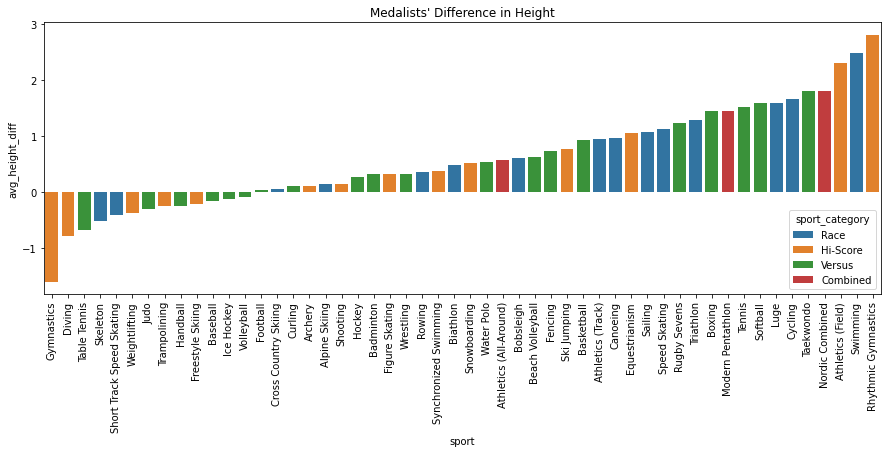

In [23]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_comparison_medalists, x='sport', y='avg_height_diff', hue='sport_category', order=avg_stats_by_sport_comparison_medalists.sort_values('avg_height_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Medalists' Difference in Height")
plt.xticks(rotation=90)
plt.show()

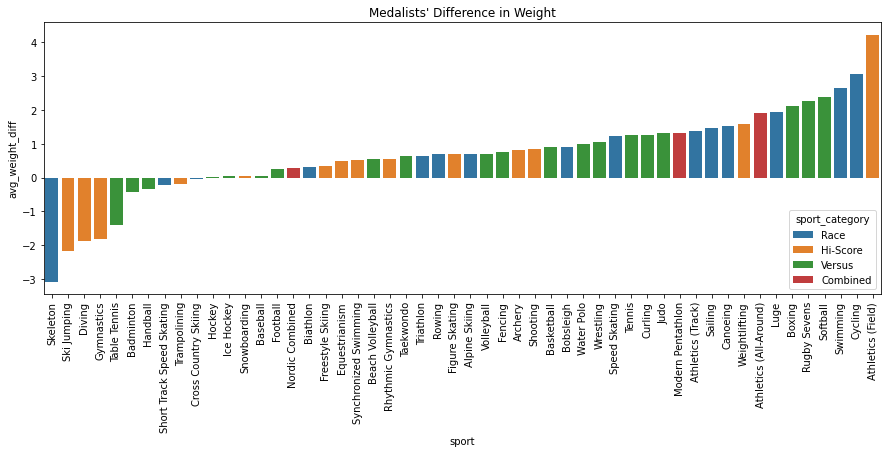

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_comparison_medalists, x='sport', y='avg_weight_diff', hue='sport_category', order=avg_stats_by_sport_comparison_medalists.sort_values('avg_weight_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Medalists' Difference in Weight")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Average stats by sport: men
avg_stats_by_sport_men = pysqldf("""SELECT
           "Sport" AS sport,
           "Sport Category" AS sport_category,
           COUNT(DISTINCT(Id)) AS competitors_men,
           AVG(Age) AS avg_age_men,
           AVG(Height) AS avg_height_men,
           AVG(Weight) AS avg_weight_men,
           AVG(BMI) AS avg_bmi_men
           FROM reduced_data
           WHERE "Sex" = "M"
           GROUP BY sport
           HAVING competitors_men >= 50
           """)

# Average stats by sport: women
avg_stats_by_sport_women = pysqldf("""SELECT
           "Sport" AS sport,
           "Sport Category" AS sport_category,
           COUNT(DISTINCT(Id)) AS competitors_women,
           AVG(Age) AS avg_age_women,
           AVG(Height) AS avg_height_women,
           AVG(Weight) AS avg_weight_women,
           AVG(BMI) AS avg_bmi_women
           FROM reduced_data
           WHERE "Sex" = "F"
           GROUP BY sport
           HAVING competitors_women >= 50
           """)

In [26]:
avg_stats_by_sex_comparison = avg_stats_by_sport_men.merge(avg_stats_by_sport_women.drop("sport_category", axis=1), how='inner', on="sport")
avg_stats_by_sex_comparison["avg_age_diff"]=avg_stats_by_sex_comparison["avg_age_men"]-avg_stats_by_sex_comparison["avg_age_women"]
avg_stats_by_sex_comparison["avg_height_diff"]=avg_stats_by_sex_comparison["avg_height_men"]-avg_stats_by_sex_comparison["avg_height_women"]
avg_stats_by_sex_comparison["avg_weight_diff"]=avg_stats_by_sex_comparison["avg_weight_men"]-avg_stats_by_sex_comparison["avg_weight_women"]
avg_stats_by_sex_comparison["avg_bmi_diff"]=avg_stats_by_sex_comparison["avg_bmi_men"]-avg_stats_by_sex_comparison["avg_bmi_women"]
avg_stats_by_sex_comparison.sort_values("avg_height_men")

,sport,sport_category,competitors_men,avg_age_men,avg_height_men,avg_weight_men,avg_bmi_men,competitors_women,avg_age_women,avg_height_women,avg_weight_women,avg_bmi_women,avg_age_diff,avg_height_diff,avg_weight_diff,avg_bmi_diff
22,Gymnastics,Hi-Score,1034,23.789828,167.605366,63.323813,22.522891,1128,18.718795,156.161405,47.792960,19.516202,5.071033,11.443961,15.530853,3.006689
43,Weightlifting,Hi-Score,1727,25.516939,169.164209,81.823037,28.085291,352,24.039216,160.472767,67.783224,25.973511,1.477723,8.691442,14.039813,2.111780
15,Diving,Hi-Score,473,22.813039,171.655801,67.067593,22.709896,458,21.647727,161.280992,53.568182,20.574723,1.165312,10.374809,13.499412,2.135173
10,Boxing,Versus,3618,23.239368,172.928654,65.368580,21.680869,52,26.728814,168.677966,61.644068,21.547781,-3.489446,4.250688,3.724512,0.133088
44,Wrestling,Versus,3220,25.704075,172.949007,76.536555,25.181655,221,25.310231,163.867987,60.554455,22.451821,0.393844,9.081020,15.982100,2.729834
33,Short Track Speed Skating,Race,223,23.185581,175.611482,71.401869,23.130142,199,22.481732,164.530447,57.123139,21.084287,0.703849,11.081035,14.278730,2.045854
18,Figure Skating,Hi-Score,453,23.539084,176.036388,69.591644,22.410942,489,20.938961,160.548052,49.861039,19.325920,2.600123,15.488336,19.730605,3.085022
32,Shooting,Hi-Score,2534,32.837359,176.096439,77.867776,25.063472,687,29.232488,164.964976,61.179046,22.453626,3.604871,11.131464,16.688730,2.609847
20,Freestyle Skiing,Hi-Score,342,24.448560,176.366255,74.648148,23.952138,262,24.386417,164.765808,58.352459,21.465774,0.062143,11.600447,16.295689,2.486364
16,Equestrianism,Hi-Score,1153,34.086765,176.605882,70.924559,22.736797,405,34.209887,167.883781,58.601908,20.795104,-0.123123,8.722101,12.322651,1.941693


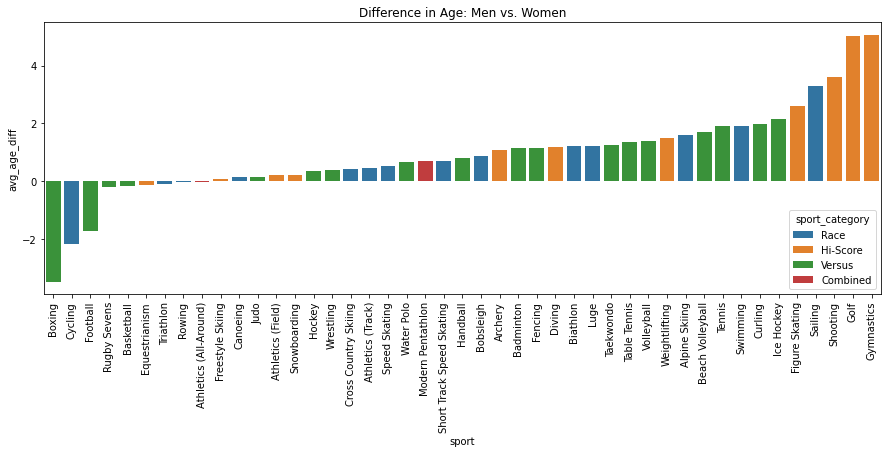

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sex_comparison, x='sport', y='avg_age_diff', hue='sport_category', order=avg_stats_by_sex_comparison.sort_values('avg_age_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Difference in Age: Men vs. Women")
plt.xticks(rotation=90)
plt.show()

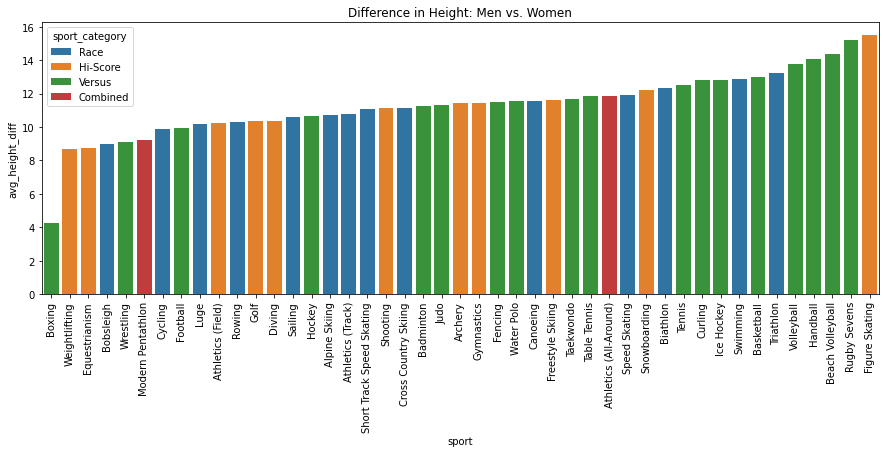

In [28]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sex_comparison, x='sport', y='avg_height_diff', hue='sport_category', order=avg_stats_by_sex_comparison.sort_values('avg_height_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Difference in Height: Men vs. Women")
plt.xticks(rotation=90)
plt.show()

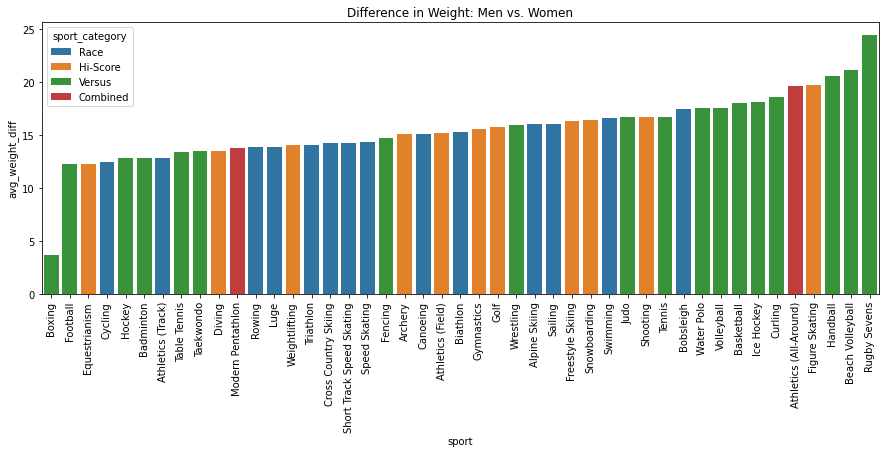

In [29]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sex_comparison, x='sport', y='avg_weight_diff', hue='sport_category', order=avg_stats_by_sex_comparison.sort_values('avg_weight_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Difference in Weight: Men vs. Women")
plt.xticks(rotation=90)
plt.show()

In [30]:
X = reduced_data.iloc[:, 4].values.reshape(-1, 1)
Y = reduced_data.iloc[:, 5].values.reshape(-1, 1)
hw_corr_model = LinearRegression()
hw_corr_model.fit(X, Y)  # perform linear regression
Y_pred = hw_corr_model.predict(X)  # make predictions

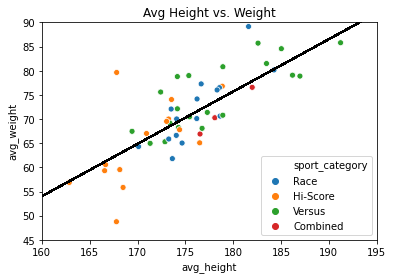

In [31]:
# Scatterplot of height vs weight, w/ best fit line
sns.scatterplot(data=avg_stats_by_sport_comparison_medalists, x='avg_height', y='avg_weight', hue='sport_category', hue_order = ["Race", "Hi-Score", "Versus", "Combined"])
plt.title("Avg Height vs. Weight")
plt.plot(X, Y_pred, color = 'black')
plt.xlim((160, 195))
plt.ylim((45, 90))
plt.show()

In [32]:
avg_stats_by_sport_hw_pred = pysqldf("""SELECT
                                        sport,
                                        sport_category,
                                        avg_height,
                                        avg_weight AS avg_weight_actual
                                        FROM avg_stats_by_sport_comparison_medalists
                                        """)
avg_stats_by_sport_hw_pred["avg_weight_pred"] = hw_corr_model.predict(avg_stats_by_sport_hw_pred['avg_height'].values.reshape(-1, 1))
avg_stats_by_sport_hw_pred["avg_weight_actual_diff"] = avg_stats_by_sport_hw_pred["avg_weight_actual"] - avg_stats_by_sport_hw_pred["avg_weight_pred"]

avg_stats_by_sport_hw_pred

,sport,sport_category,avg_height,avg_weight_actual,avg_weight_pred,avg_weight_actual_diff
0,Alpine Skiing,Race,173.516925,72.082648,68.679958,3.402689
1,Archery,Hi-Score,173.249602,70.014870,68.390383,1.624486
2,Athletics (All-Around),Combined,181.989805,76.573679,77.858112,-1.284433
3,Athletics (Field),Hi-Score,178.864324,76.809051,74.472469,2.336583
4,Athletics (Track),Race,174.658822,65.045039,69.916906,-4.871866
5,Badminton,Versus,174.278481,68.275130,69.504906,-1.229775
6,Baseball,Versus,182.599291,85.718085,78.518331,7.199755
7,Basketball,Versus,191.226554,85.801799,87.863718,-2.061918
8,Beach Volleyball,Versus,186.202602,79.089219,82.421578,-3.332358
9,Biathlon,Race,174.052004,66.631419,69.259577,-2.628158


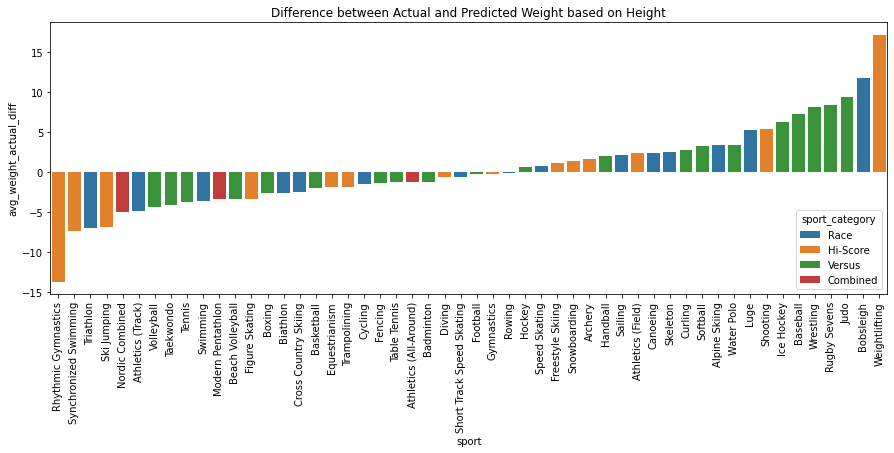

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_stats_by_sport_hw_pred, x='sport', y='avg_weight_actual_diff', hue='sport_category', order=avg_stats_by_sport_hw_pred.sort_values('avg_weight_actual_diff')["sport"], hue_order = ["Race", "Hi-Score", "Versus", "Combined"], dodge=False)
plt.title("Difference between Actual and Predicted Weight based on Height")
plt.xticks(rotation=90)
plt.show()

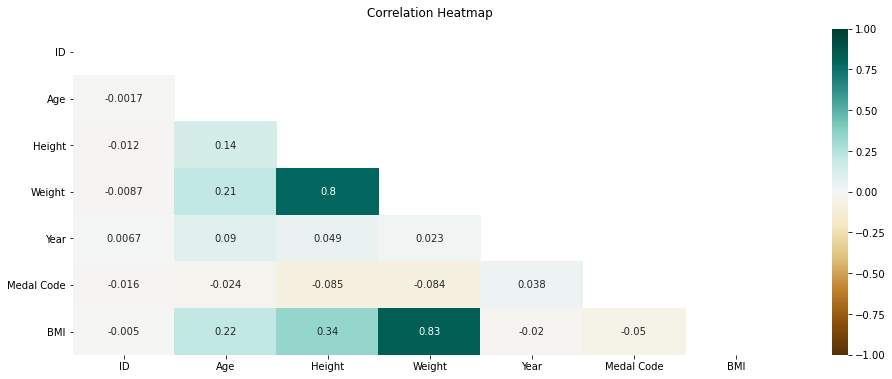

In [34]:
corr_mat = reduced_data.corr()
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

heatmap